In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random as rd

In [2]:
couple_data = pd.read_csv('Resources/actual_data.csv',sep='\t')
couple_df  = couple_data
couple_df.head()


,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,,,,...,,,,,,,,,,
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,,,,...,,,,,,,,,,
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,,,,...,,,,,-0.1,,,,,
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,,,,...,,,,,,,,,,
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,,,,...,,,,,,,,,,


In [3]:
couple_df = couple_df.replace({" ":0})
couple_df.tail()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerSqrMer,...,A-B-CerCnjJun,A-B-CerSxtJun,A-B-CerSqrJun,A-B-CerTriJun,A-B-CerOppJun,A-B-CerCnjCer,A-B-CerSxtCer,A-B-CerSqrCer,A-B-CerTriCer,A-B-CerOppCer
19517,Bourg2538,1912.06.06 09:00:00,Bourg2539,1913.11.22 04:00:00,47N04-2E22,47N04-2E22,1.458,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19518,15Pari3873,1902.04.21 03:50:40,15Pari3874,1904.04.13 20:35:40,48N49-2E19,48N49-2E19,1.978,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19519,Bourg441,1933.11.29 11:00:00,Bourg442,1934.09.19 03:10:00,47N04-2E22,47N04-2E22,0.803,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19520,Lil4511,1897.09.21 02:50:40,Lil4514,1898.03.29 06:20:40,50N39-3E04,50N39-3E04,0.522,0,0,0,...,0,0,0,0,0,-0.7,0,0,0,0
19521,14PRPari4269,1899.05.28 10:50:40,14PRPari4270,1897.06.05 17:50:40,47N40-2W43,43N31-6E28,-1.978,0,0,0,...,0,0,4.6,0,0,0,0,0,0,0


In [4]:
couple_df.to_csv('couple_data')

In [5]:
updated_df = couple_df.loc[:,~couple_df.columns.str.contains('Sqr|Opp')]
updated_df2 = updated_df.loc[:,~updated_df.columns.str.contains('Nod|Jun|Cer')]
updated_df2.head()

,Chart_A_Name,Chart_A_UTCDate,Chart_B_Name,Chart_B_UTCDate,Chart_A_LatLong,Chart_B_LatLong,B_Minus_A_AgeDifference_Years,A-B-MerCnjMer,A-B-MerSxtMer,A-B-MerTriMer,...,A-B-SatTriSun,A-B-SatCnjMar,A-B-SatSxtMar,A-B-SatTriMar,A-B-SatCnjJup,A-B-SatSxtJup,A-B-SatTriJup,A-B-SatCnjSat,A-B-SatSxtSat,A-B-SatTriSat
0,15Pari10780,1911.03.09 09:50:40,15Pari10789,1911.04.01 21:20:00,48N49-2E19,48N49-2E19,0.064,0,0,0,...,0,0,0,0,0,0,0,-2.6,0,0
1,15Pari76,1880.03.10 10:50:40,15Pari77,1898.08.24 09:20:40,48N49-2E19,48N49-2E19,18.453,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,14PRPari490,1884.04.06 02:52:24,14PRPari491,1886.09.08 20:39:28,47N54-1E54,48N07-5E07,2.422,0,0,6.1,...,0,0,0,0,0,0,3.2,0,0,0
3,Bourg2385,1935.10.09 14:40:00,Bourg2386,1937.10.02 20:30:00,47N04-2E22,47N04-2E22,1.981,0,0,0,...,0,0,-2.6,0,0,0,0,0,0,0
4,Bourg1498,1893.06.27 19:50:40,Bourg1499,1900.10.11 11:20:40,48N49-2E19,47N04-2E22,7.289,0,0,0,...,0,0,2.1,0,0,2.1,0,0,0,0


In [6]:
#couple_df['A-B-MerCnjMer'].str.strip()

#for row in couple_df['A-B-MerCnjMer'].iteritems():
#    print(repr(row))

# X = smoking[['Age', 'Height', 'Sex_Female', 'Sex_Male', 'Smoker_Current', 'Smoker_Non']]
X = updated_df2[['B_Minus_A_AgeDifference_Years','A-B-VenTriSun']]

print(X.shape)
X
X['A-B-VenTriSun'].dtype
a = pd.to_numeric(X['A-B-VenTriSun'])

(19522, 2)


<function matplotlib.pyplot.show(*args, **kw)>

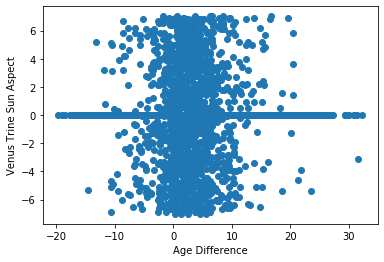

In [7]:
plt.scatter(X['B_Minus_A_AgeDifference_Years'],X['A-B-VenTriSun'])
plt.xlabel('Age Difference')
plt.ylabel('Venus Trine Sun Aspect')
plt.show

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
# Fit the model to the data
kmeans.fit(X)
# Use the data to predict the clusters
# save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X)
predicted_clusters

array([2, 0, 1, ..., 2, 2, 2])

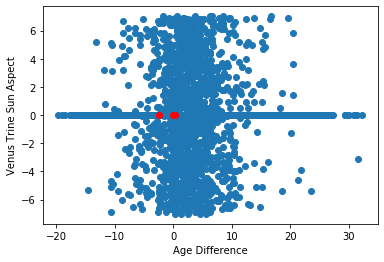

In [9]:
K=3
Centroids = (X.sample(n=K))
plt.scatter(X['B_Minus_A_AgeDifference_Years'],X['A-B-VenTriSun'])
plt.scatter(Centroids['B_Minus_A_AgeDifference_Years'],Centroids["A-B-VenTriSun"],c='red')
plt.xlabel('Age Difference')
plt.ylabel('Venus Trine Sun Aspect')
plt.show()

In [18]:

# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

#np.array(Wapproxlist, dtype=np.float64)


diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=np.array((row_c["B_Minus_A_AgeDifference_Years"]-row_d["B_Minus_A_AgeDifference_Years"])**2)
            d2=np.array((row_c[a]-row_d[a])**2)
            d=np.sqrt(np.array((d1+d2))
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["A-B-VenTriSun","B_Minus_A_AgeDifference_Years"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['A-B-VenTriSun'] - Centroids['A-B-VenTriSun']).sum() + (Centroids_new['B_Minus_A_AgeDifference_Years'] - Centroids['B_Minus_A_AgeDifference_Years']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["A-B-VenTriSun","B_Minus_A_AgeDifference_Years"]]


SyntaxError: invalid syntax (<ipython-input-18-6bbce405793d>, line 20)

In [19]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_
d


NameError: name 'd' is not defined

In [ ]:
centers

In [ ]:
labels